In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

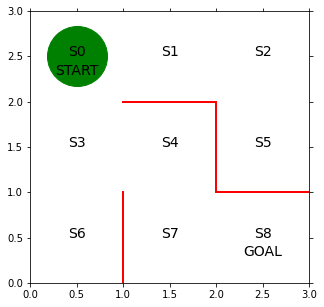

In [8]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()

plt.plot([1,1],[0,1],color='red',linewidth=2)
plt.plot([1,2],[2,2],color='red',linewidth=2)
plt.plot([2,2],[2,1],color='red',linewidth=2)
plt.plot([2,3],[1,1],color='red',linewidth=2)

plt.text(0.5,2.5,'S0',size=14,ha='center')
plt.text(1.5,2.5,'S1',size=14,ha='center')
plt.text(2.5,2.5,'S2',size=14,ha='center')
plt.text(0.5,1.5,'S3',size=14,ha='center')
plt.text(1.5,1.5,'S4',size=14,ha='center')
plt.text(2.5,1.5,'S5',size=14,ha='center')
plt.text(0.5,0.5,'S6',size=14,ha='center')
plt.text(1.5,0.5,'S7',size=14,ha='center')
plt.text(2.5,0.5,'S8',size=14,ha='center')
plt.text(0.5,2.3,'START',size=14,ha='center')
plt.text(2.5,0.3,'GOAL',size=14,ha='center')

ax.set_xlim(0,3)
ax.set_ylim(0,3)
plt.tick_params(axis='both',which='both',bottom='off',top='off',
               labelbottom='off',right='off',left='off',labelleft='off')

line,=ax.plot([0.5],[2.5],marker='o',color='g',markersize=60)

In [9]:
theta_0 = np.array([[np.nan,1,1,np.nan],
                   [np.nan,1,np.nan,1],
                    [np.nan,np.nan,1,1],
                    [1,1,1,np.nan],
                    [np.nan,np.nan,1,1],
                    [1,np.nan,np.nan,np.nan],
                    [1,np.nan,np.nan,np.nan],
                    [1,1,np.nan,np.nan],
                   ])

In [10]:
def simple_convert_into_pi_from_theta(theta):
    [m,n]=theta.shape
    pi=np.zeros((m,n))#行：状态；列：行动
    for i in range(0,m):
        pi[i,:]=theta[i,:]/np.nansum(theta[i,:])#每行求概率，每个状态，采取不同行动的概率
    pi = np.nan_to_num(pi)
    
    return pi
    

In [11]:
pi_0=simple_convert_into_pi_from_theta(theta_0)
pi_0

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ]])

In [14]:
def get_next_s(pi,s):
    dircection = ['up','right','down','left']
    next_dircection = np.random.choice(dircection,p=pi[s,:])
    if next_dircection=='up':
        s_next = s-3
    elif next_dircection=='right':
        s_next = s+1
    elif next_dircection=='down':
        s_next = s+3
    elif next_dircection=='left':
        s_next = s-1
    
    return s_next
        

In [15]:
def goal_maze(pi):
    s=0
    state_history=[0]
    while(1):
        next_s = get_next_s(pi,s)
        state_history.append(next_s)
        
        if next_s ==8:
            break
        else:
            s=next_s
    return state_history

In [17]:
state_history=goal_maze(pi_0)
print(state_history)
print('Total Steps is ' + str(len(state_history)-1))

[0, 1, 0, 1, 0, 3, 4, 3, 6, 3, 6, 3, 6, 3, 6, 3, 4, 3, 6, 3, 0, 3, 0, 1, 2, 5, 2, 1, 2, 1, 0, 3, 4, 7, 4, 7, 8]
Total Steps is 36


In [18]:
from matplotlib import animation
from IPython.display import HTML

In [19]:
def init():
    line.set_data([],[])
    return (line,)
def animate(i):
    state = state_history[i]
    x = (state%3)+0.5
    y = 2.5-int(state/3)
    line.set_data(x,y)
    return (line,)
anim = animation.FuncAnimation(fig,animate,init_func=init,
                               frames=len(state_history),interval=200,repeat=False)
HTML(anim.to_jshtml())
    

In [20]:
def softmax_convert_into_pi_from_theta(theta):
    beta=1.0
    [m,n]=theta.shape
    pi=np.zeros((m,n))#行：状态；列：行动
    exp_theta=np.exp(beta * theta)
    for i in range(0,m):
        pi[i,:]=exp_theta[i,:]/np.nansum(exp_theta[i,:])#每行求概率，每个状态，采取不同行动的概率
    pi = np.nan_to_num(pi)
    
    return pi
    

In [21]:
pi_0=softmax_convert_into_pi_from_theta(theta_0)
pi_0

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ]])

In [22]:
def get_action_and_next_s(pi,s):
    dircection = ['up','right','down','left']
    next_dircection = np.random.choice(dircection,p=pi[s,:])
    if next_dircection=='up':
        action=0
        s_next = s-3
    elif next_dircection=='right':
        action=1
        s_next = s+1
    elif next_dircection=='down':
        action=2
        s_next = s+3
    elif next_dircection=='left':
        action=3
        s_next = s-1
    
    return [action,s_next]

In [31]:
def goal_maze_ret_s_a(pi):
    s=0
    s_a_history=[[0,np.nan]]
    while(1):
        [action,next_s] = get_action_and_next_s(pi,s)
        s_a_history[-1][1]=action
        s_a_history.append([next_s, np.nan])
        
        if next_s ==8:
            break
        else:
            s=next_s
    return s_a_history
    

In [32]:
s_a_history=goal_maze_ret_s_a(pi_0)
print(s_a_history)
print('Total Steps is ' + str(len(s_a_history)-1))

[[0, 2], [3, 0], [0, 2], [3, 1], [4, 2], [7, 0], [4, 2], [7, 0], [4, 3], [3, 2], [6, 0], [3, 1], [4, 2], [7, 0], [4, 3], [3, 2], [6, 0], [3, 2], [6, 0], [3, 0], [0, 1], [1, 3], [0, 2], [3, 1], [4, 2], [7, 1], [8, nan]]
Total Steps is 26


In [33]:
def update_theta(theta,pi,s_a_history):
    eta = 0.1
    T = len(s_a_history) - 1
    [m,n]=theta.shape
    delta_theta = theta.copy()
    
    for i in range(0,m):
        for j in range(0,n):
            if not(np.isnan(theta[i,j])):
                
                SA_i = [SA for SA in s_a_history if SA[0]==i]
                SA_ij = [SA for SA in s_a_history if SA==[i,j]]
                N_i = len(SA_i)
                N_ij = len(SA_ij)
                delta_theta[i,j]=(N_ij - pi[i,j] * N_i)/T
    new_theta = theta + eta*delta_theta
    return new_theta

In [37]:
new_theta=update_theta(theta_0,pi_0,s_a_history)
pi=softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[0.         0.49375033 0.50624967 0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33054408 0.33891184 0.33054408 0.        ]
 [0.         0.         0.50624967 0.49375033]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.49375033 0.50624967 0.         0.        ]]


In [39]:
stop_epsilon = 10**-4
theta=theta_0
pi=pi_0
is_continue=True
count=1
while is_continue:
    s_a_history=goal_maze_ret_s_a(pi)
    new_theta=update_theta(theta,pi,s_a_history)
    new_pi=softmax_convert_into_pi_from_theta(new_theta)
    print(np.sum(np.abs(new_pi-pi)))
    print('Total Steps is ' + str(len(s_a_history)-1))
    if np.sum(np.abs(new_pi-pi))<stop_epsilon:
        is_continue=False
    else:
        theta = new_theta
        pi=new_pi

0.019436637462403927
Total Steps is 10
0.027008778646128773
Total Steps is 8
0.023728332011295705
Total Steps is 16
0.027485509736186686
Total Steps is 18
0.04055172520155331
Total Steps is 6
0.01810674416440783
Total Steps is 22
0.023420022118519734
Total Steps is 22
0.01023280147079858
Total Steps is 18
0.009393120260091925
Total Steps is 84
0.013074762383269545
Total Steps is 46
0.025816082915015692
Total Steps is 10
0.01108800391114223
Total Steps is 18
0.013055995733424697
Total Steps is 30
0.017932220733931692
Total Steps is 16
0.009498973476787353
Total Steps is 78
0.005234847715064439
Total Steps is 36
0.0106364138332532
Total Steps is 38
0.03109915286828102
Total Steps is 6
0.007737183695162686
Total Steps is 64
0.0074186685400480235
Total Steps is 70
0.014436596439556304
Total Steps is 20
0.005254031444123897
Total Steps is 156
0.004869463986520328
Total Steps is 94
0.03187116507205834
Total Steps is 6
0.011961214359295702
Total Steps is 30
0.018763043580290018
Total Steps is

In [41]:
def init():
    line.set_data([],[])
    return (line,)
def animate(i):
    state = s_a_history[i][0]
    x = (state%3)+0.5
    y = 2.5-int(state/3)
    line.set_data(x,y)
    return (line,)
anim = animation.FuncAnimation(fig,animate,init_func=init,
                               frames=len(s_a_history),interval=200,repeat=False)
HTML(anim.to_jshtml())

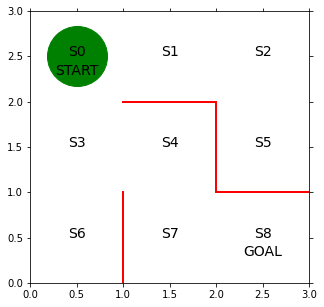

In [43]:
#sarsa
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(5,5))
ax = plt.gca()

plt.plot([1,1],[0,1],color='red',linewidth=2)
plt.plot([1,2],[2,2],color='red',linewidth=2)
plt.plot([2,2],[2,1],color='red',linewidth=2)
plt.plot([2,3],[1,1],color='red',linewidth=2)

plt.text(0.5,2.5,'S0',size=14,ha='center')
plt.text(1.5,2.5,'S1',size=14,ha='center')
plt.text(2.5,2.5,'S2',size=14,ha='center')
plt.text(0.5,1.5,'S3',size=14,ha='center')
plt.text(1.5,1.5,'S4',size=14,ha='center')
plt.text(2.5,1.5,'S5',size=14,ha='center')
plt.text(0.5,0.5,'S6',size=14,ha='center')
plt.text(1.5,0.5,'S7',size=14,ha='center')
plt.text(2.5,0.5,'S8',size=14,ha='center')
plt.text(0.5,2.3,'START',size=14,ha='center')
plt.text(2.5,0.3,'GOAL',size=14,ha='center')

ax.set_xlim(0,3)
ax.set_ylim(0,3)
plt.tick_params(axis='both',which='both',bottom='off',top='off',
               labelbottom='off',right='off',left='off',labelleft='off')

line,=ax.plot([0.5],[2.5],marker='o',color='g',markersize=60)

theta_0 = np.array([[np.nan,1,1,np.nan],
                   [np.nan,1,np.nan,1],
                    [np.nan,np.nan,1,1],
                    [1,1,1,np.nan],
                    [np.nan,np.nan,1,1],
                    [1,np.nan,np.nan,np.nan],
                    [1,np.nan,np.nan,np.nan],
                    [1,1,np.nan,np.nan],
                   ])

In [64]:
[a,b] = theta_0.shape
Q=np.random.rand(a,b) * theta_0

In [65]:
#def simple_convert_into_pi_from_theta(theta)

In [66]:
def get_action(s,Q,epsilon,pi_0):
    direction = ['up','right','down','left']
    
    if np.random.rand()<epsilon:
        next_direction = np.random.choice(direction,p=pi[s,:])
    else:
        next_direction = direction[np.nanargmax(Q[s,:])]
    if next_direction=='up':
        action=0
        
    elif next_direction=='right':
        action=1
        
    elif next_direction=='down':
        action=2
        
    elif next_direction=='left':
        action=3
        
    
    return action

In [67]:
def get_s_next(s,a,Q,epsilon,pi_0):
    direction = ['up','right','down','left']
    next_direction = direction[a]
    if next_direction=='up':
        s_next = s-3
    elif next_direction=='right':
        s_next = s+1
    elif next_direction=='down':
        s_next = s+3
    elif next_direction=='left':
        s_next = s-1
    
    return s_next

In [68]:
def Sarsa(s,a,r,s_next,a_next,Q,eta,gamma):
    if s_next == 8:
        Q[s,a]=Q[s,a] + eta*(r-Q[s,a])
    else:
        Q[s,a]= Q[s,a] + eta*(r+gamma*Q[s_next,a_next]-Q[s,a])
    return Q

In [73]:
def goal_maze_ret_s_a_Q(Q,epsilon,eta,gamma,pi):
    s=0
    a=a_next=get_action(s,Q,epsilon,pi)
    s_a_history=[[0,np.nan]]
    while(1):
        a = a_next
        
        s_a_history[-1][1]=a
        
        s_next = get_s_next(s,a,Q,epsilon,pi)
        
        s_a_history.append([s_next,np.nan])
        if s_next==8:
            r=1
            a_next=np.nan
        else:
            r=0
            a_next=get_action(s_next,Q,epsilon,pi)
        #Q=Sarsa(s,a,r,s_next,a_next,Q,eta,gamma)
        Q=Q_learning(s,a,r,s_next,Q,eta,gamma)
        if s_next ==8:
            break
        else:
            s=s_next
    return [s_a_history,Q]

In [70]:
eta=0.1
gamma=0.9
epsilon=0.5
v=np.nanmax(Q,axis=1)
is_continue=True
episode=1
while is_continue:
    print('Episode now is ' + str(episode))
    epsilon=epsilon/2
    [s_a_history,Q]=goal_maze_ret_s_a_Q(Q,epsilon,eta,gamma,pi_0)
    new_v=np.nanmax(Q,axis=1)
    print(np.sum(np.abs(new_v-v)))
    v=new_v
    print('Total steps is '+str(len(s_a_history)-1))
    episode=episode+1
    if episode>100:
        break

Episode now is 1
0.49822842763321906
Total steps is 32
Episode now is 2
0.3145427278856213
Total steps is 56
Episode now is 3
1.144517376398793
Total steps is 340
Episode now is 4
0.11954389086850276
Total steps is 44
Episode now is 5
0.16174678298573347
Total steps is 66
Episode now is 6
0.09374622580301745
Total steps is 20
Episode now is 7
0.06135591493361703
Total steps is 6
Episode now is 8
0.0689794505176336
Total steps is 10
Episode now is 9
0.06341617542282746
Total steps is 8
Episode now is 10
0.05729127398642542
Total steps is 8
Episode now is 11
0.05680617014368661
Total steps is 6
Episode now is 12
0.05217731599180686
Total steps is 6
Episode now is 13
0.04903456429855585
Total steps is 4
Episode now is 14
0.047073896574850005
Total steps is 4
Episode now is 15
1.1104096958068044
Total steps is 252
Episode now is 16
0.04512323217428993
Total steps is 4
Episode now is 17
0.044639174112906466
Total steps is 4
Episode now is 18
0.044100494828285985
Total steps is 4
Episode now

In [71]:
def Q_learning(s,a,r,s_next,Q,eta,gamma):
    if s_next == 8:
        Q[s,a]=Q[s,a] + eta*(r-Q[s,a])
    else:
        Q[s,a]= Q[s,a] + eta*(r+gamma*np.nanmax(Q[s_next,:])-Q[s,a])
    return Q
    

In [72]:
[a,b] = theta_0.shape
Q=np.random.rand(a,b) * theta_0 *0.1

In [74]:
eta=0.1
gamma=0.9
epsilon=0.5
v=np.nanmax(Q,axis=1)
is_continue=True
episode=1

V=[]
V.append(np.nanmax(Q,axis=1))

while is_continue:
    print('Episode now is ' + str(episode))
    epsilon=epsilon/2
    [s_a_history,Q]=goal_maze_ret_s_a_Q(Q,epsilon,eta,gamma,pi_0)
    new_v=np.nanmax(Q,axis=1)
    print(np.sum(np.abs(new_v-v)))
    v=new_v
    V.append(v)
    print('Total steps is '+str(len(s_a_history)-1))
    episode=episode+1
    if episode>100:
        break

Episode now is 1
0.09753116478037584
Total steps is 6
Episode now is 2
0.09540981468800744
Total steps is 10
Episode now is 3
0.1425613489046575
Total steps is 72
Episode now is 4
0.14493700778050211
Total steps is 116
Episode now is 5
0.09797334896974227
Total steps is 12
Episode now is 6
0.09937455247218513
Total steps is 16
Episode now is 7
0.09559109420512563
Total steps is 14
Episode now is 8
0.09051629533597577
Total steps is 10
Episode now is 9
0.0868021223221733
Total steps is 8
Episode now is 10
0.08321611794130038
Total steps is 4
Episode now is 11
0.08228280487845879
Total steps is 4
Episode now is 12
0.08124890144343837
Total steps is 4
Episode now is 13
0.08011550983593155
Total steps is 4
Episode now is 14
0.07888473843854148
Total steps is 4
Episode now is 15
0.07755972890443184
Total steps is 4
Episode now is 16
0.07614461768917918
Total steps is 4
Episode now is 17
0.07464445248893864
Total steps is 4
Episode now is 18
0.07306507958656472
Total steps is 4
Episode now i

In [75]:
import matplotlib.cm as cm

In [76]:
def init():
    line.set_data([],[])
    return (line,)
def animate(i):
    line,=ax.plot([0.5],[2.5],marker='s',
                 color=cm.jet(V[i][0]),markersize=85)
    line,=ax.plot([1.5],[2.5],marker='s',
                 color=cm.jet(V[i][1]),markersize=85)
    line,=ax.plot([2.5],[2.5],marker='s',
                 color=cm.jet(V[i][2]),markersize=85)
    line,=ax.plot([0.5],[1.5],marker='s',
                 color=cm.jet(V[i][3]),markersize=85)
    line,=ax.plot([1.5],[1.5],marker='s',
                 color=cm.jet(V[i][4]),markersize=85)
    line,=ax.plot([2.5],[1.5],marker='s',
                 color=cm.jet(V[i][5]),markersize=85)
    line,=ax.plot([0.5],[0.5],marker='s',
                 color=cm.jet(V[i][6]),markersize=85)
    line,=ax.plot([1.5],[0.5],marker='s',
                 color=cm.jet(V[i][7]),markersize=85)
    line,=ax.plot([2.5],[0.5],marker='s',
                 color=cm.jet(1.0),markersize=85)

    
    return (line,)
anim = animation.FuncAnimation(fig,animate,init_func=init,
                               frames=len(V),interval=200,repeat=False)
HTML(anim.to_jshtml())